# This script contains the Following:

### Personally Identifiable Information PII

### Regional Segmentations

### Exclusions for low activity customers

### Creating Customer Profiles including, income, age, family status

### Statistics such as the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Customer Profile Analysis by regions and departments

## 0.1 Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 0.2 Import Data into Jupyter

In [2]:
#Creating a folder path

path = r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 4_03-2024 Instacart Basket Analysis/'

In [3]:
path

'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 4_03-2024 Instacart Basket Analysis/'

In [4]:
# Q.1 Import ord_prods_cust dataset from 4.9 part one

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data ', 'Prepared Data', 'ords_prods_cust.pkl'))

## 0.3 Security Implications

In [5]:
# Q.2 Consider any security implications that might exist for this new data
#Check output

df_ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Last_name,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


#### The dataset contains Personally Identifiable Information (PII) such as first and last name, income, marital state and state.  However, it's important to note that this data has been the customer data as well as prices column have been fabricated for the purpose of this task, to protect the privacy of customers.

## 0.4 Regional Segmentation

### Q.3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [10]:
# Create a new column 'region' using loc function with mapping for Northeast States

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [12]:
# Create region Northeast

df_ords_prods_cust.loc[df_ords_prods_cust['State'].isin(Northeast),'regions']= 'Northeast' 

In [11]:
# Create a new column 'region' using loc function with mapping for Midwest States

Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [13]:
# Create region Midwest

df_ords_prods_cust.loc[df_ords_prods_cust['State'].isin(Midwest),'regions']= 'Midwest' 

In [15]:
# Create a new column 'region' using loc function with mapping for South States

South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [16]:
# Create region South

df_ords_prods_cust.loc[df_ords_prods_cust['State'].isin(South),'regions']= 'South'

In [17]:
# Create a new column 'region' using loc function with mapping for West States

West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [18]:
# Create region West

df_ords_prods_cust.loc[df_ords_prods_cust['State'].isin(West),'regions']= 'West'

In [19]:
# Check count by region

df_ords_prods_cust['regions'].value_counts(dropna = False)

regions
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [22]:
#Check output

df_ords_prods_cust[['regions','State']].tail(20)

,regions,State
32404839,Northeast,Vermont
32404840,Northeast,Vermont
32404841,Northeast,Vermont
32404842,Northeast,Vermont
32404843,Northeast,Vermont
32404844,Northeast,Vermont
32404845,Northeast,Vermont
32404846,Northeast,Vermont
32404847,Northeast,Vermont
32404848,West,Washington


### Spending habits by Region

In [24]:
# Create spending flag, low spender

df_ords_prods_cust.loc[df_ords_prods_cust['prices'] < 10, 'spending_flag'] = 'low spender'

In [25]:
# Create spending flag, high spender

df_ords_prods_cust.loc[(df_ords_prods_cust['prices'] >= 10) & (df_ords_prods_cust['prices'] <= 25), 'spending_flag'] = 'high spender'

In [26]:
# Create a Crosstab(pivot) of Region and spending Flag

spending_by_region = pd.crosstab(df_ords_prods_cust['regions'], df_ords_prods_cust['spending_flag'], dropna = False)

In [27]:
# Check output

spending_by_region

spending_flag,high spender,low spender,nan
regions,,,
Midwest,2495774,5100291,1260
Northeast,1874326,3847566,844
South,3547836,7242260,1789
West,2720859,5570820,1234


In [44]:
# Create total customers and sort by regions

total_customers = df_ords_prods_cust['regions'].value_counts()

In [45]:
total_customers

regions
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [31]:
# Step 1 of creating Bar chart for high spenders, filter high spenders

high_spenders = df_ords_prods_cust[df_ords_prods_cust['spending_flag'] == 'high spender']

In [33]:
# Step 2 Groupby and count high spenders by regions

high_spenders_counts = high_spenders.groupby('regions').size()

In [34]:
# Check output matches counts from earlier

high_spenders_counts.head()

regions
Midwest      2495774
Northeast    1874326
South        3547836
West         2720859
dtype: int64

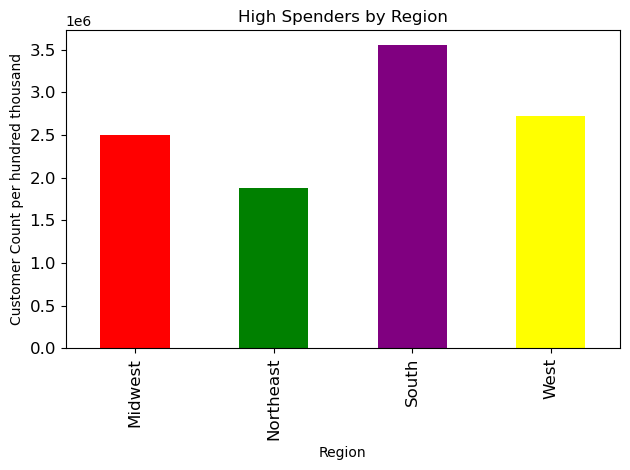

In [36]:
# Step 3 execute bar chart for high spenders

# Colours
bar_regional_high_spenders = high_spenders_counts.plot.bar(color = ['red', 'green', 'purple', 'yellow'])
# Title
plt.title('High Spenders by Region')
# X axis label
plt.xlabel('Region')
# Y axis label
plt.ylabel('Customer Count per hundred thousand')

# Labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Step 1 of creating Bar chart for low spenders, filter low spenders

low_spenders = df_ords_prods_cust[df_ords_prods_cust['spending_flag'] == 'low spender']

In [38]:
# Step 2 Groupby and count low spenders by regions

low_spenders_counts = low_spenders.groupby('regions').size()

In [39]:
# Check output matches counts from earlier

low_spenders_counts.head()

regions
Midwest      5100291
Northeast    3847566
South        7242260
West         5570820
dtype: int64

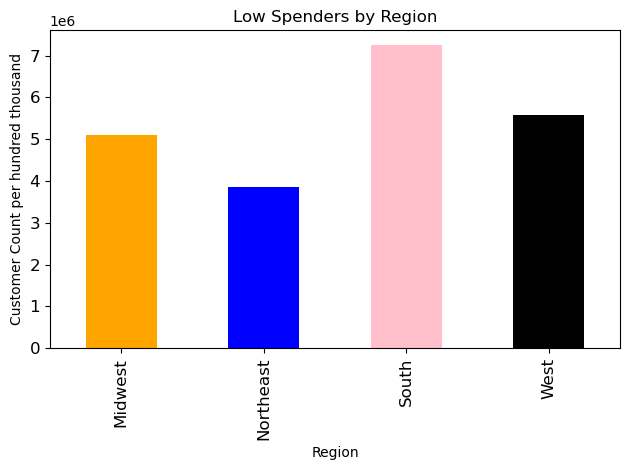

In [40]:
# Step 3 execute bar chart for low spenders

# Colours
bar_regional_low_spenders = low_spenders_counts.plot.bar(color = ['orange', 'blue', 'pink', 'black'])
# Title
plt.title('Low Spenders by Region')
# X axis label
plt.xlabel('Region')
# Y axis label
plt.ylabel('Customer Count per hundred thousand')

# Labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
#Export outside Jupyter in form of an image

bar_regional_high_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_high_spenders.png'))

In [42]:
#Export outside Jupyter in form of an image

bar_regional_low_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_low_spenders.png'))

#### Looking at the data analysis above, we can see customer behaviour shows a a tendency in spending habits: the South region has both the largest number of customers who are the highest and lowest spenders. Looking back at when I set the regions, I can also see that the South region has the largest number of states and therefore overall customers. 
#### The next step to gain a more accurate understanding of customer behavious and the ratio of low spenders vs. high spenders in each region; I plan to calculate the percentages based on the total number of customers in each region.

In [46]:
# Calculate total number of customers

total_customers_count = high_spenders_counts.sum() + low_spenders_counts.sum()

In [48]:
# Calculate percentages of high spender counts for bar chart

percent_high_spenders = (high_spenders_counts / total_customers_count) * 100

In [49]:
# Calculate percentages of low spender counts for bar chart

percent_low_spenders = (low_spenders_counts / total_customers_count) * 100

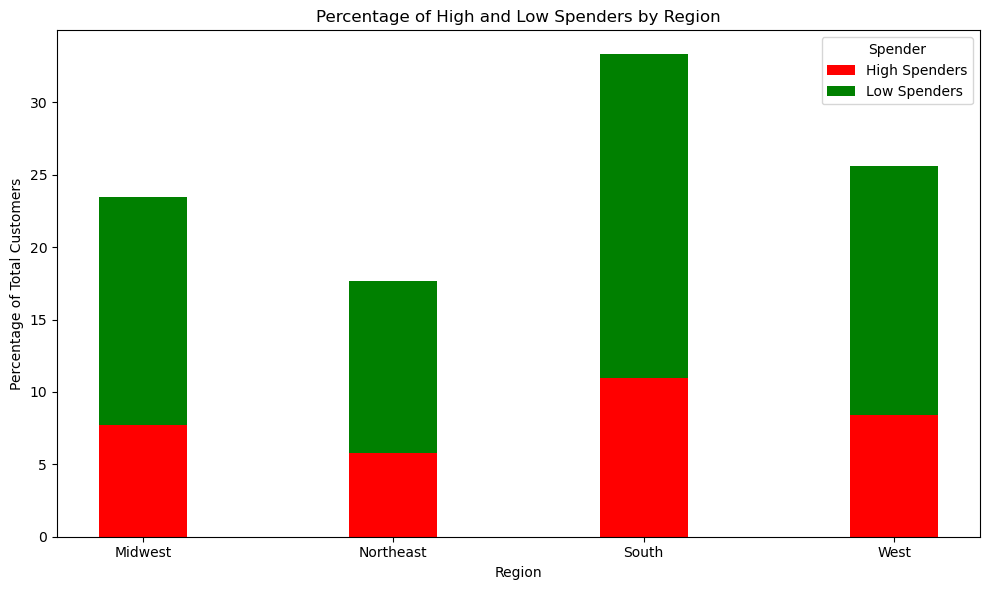

In [56]:
# Set Bar Chart

# Define the number of regions
num_regions = len(high_spenders_counts.index)

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x locations for the bars
x = range(num_regions)

# Plot the bars for high spenders
bar_high_spenders = ax.bar(x, percent_high_spenders, bar_width, color='red', label='High Spenders')

# Plot the bars for low spenders on top of the high spenders
bar_low_spenders = ax.bar(x, percent_low_spenders, bar_width, bottom=percent_high_spenders, color='Green', label='Low Spenders')

# Add title and axis labels
plt.title('Percentage of High and Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Total Customers')

# Customize tick labels and font size
plt.xticks(x, high_spenders_counts.index)
plt.yticks()

# Customize legend
ax.legend(title='Spender')

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
#Export outside Jupyter in form of an image

fig.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_percent_high_low.png'))

## 0.5 Exclusion for Low-Activity Customers

### Q. 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [63]:
df_ords_prods_cust.shape

(32404859, 37)

In [67]:
# Create an exclusion flag

df_ords_prods_cust['exclusion_flag'] = df_ords_prods_cust['max_order'] < 5

In [68]:
df_ords_prods_cust['exclusion_flag'].value_counts()

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [70]:
df_exclusion = df_ords_prods_cust.loc[df_ords_prods_cust['exclusion_flag'] == False]


In [71]:
low_activity = df_ords_prods_cust.loc[df_ords_prods_cust['exclusion_flag'] == True]

In [72]:
df_exclusion .shape

(30964564, 39)

In [73]:
df_exclusion ['max_order'].describe()

count    3.096456e+07
mean     3.442569e+01
std      2.489504e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [74]:
# Create a new dataset with orders > 5

df_order_less_5 = df_ords_prods_cust[df_ords_prods_cust['exclusion_flag']]

In [78]:
# Export new dataset 'sample' in pickle format

df_order_less_5.to_pickle(os.path.join(path, '02 Data ', 'Prepared Data', 'df_order_less_5.pkl'))

In [79]:
# Export new dataset 'sample' in csv

df_order_less_5.to_csv(os.path.join(path, '02 Data ', 'Prepared Data', 'df_order_less_5.csv'))

## 0.6 Customer Profiles, income, age, family status

### Q 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [81]:
# Check output
df_ords_prods_cust.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,average_spend,Customer_frequency,Age,dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,2.559866e+04,7.119612e+01,9.919792e+00,1.198023e+01,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,8.352547e+00,5.895873e-01,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,1.408400e+04,3.821139e+01,6.281485e+00,4.956554e+02,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,7.127071e+00,4.919087e-01,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,2.530200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [82]:
df_ords_prods_cust.shape

(32404859, 39)

#### Firstly, I'll set the income column into three distinct tiers 'low income' (with the upper threshold at 60,000), 'Middle income' (any thing over 60,000 and less than 120,000), and 'high income', (anything over 120,000).

In [83]:
# Define function to categorize income levels

def categorize_income(income):
    if income < 60000:
        return "Low Income"
    elif 60000 <= income < 120000:
        return "Middle Income"
    else:
        return "High Income"

#### Next, I'll set age groups, starting with 'Young adult' under 30, 'Middle aged adult' 30-55, 'Senior', 55+

In [84]:
# Define function to categorize age groups
def categorize_age(Age):
    if Age <= 30:
        return "Young Adult"
    elif 30 < Age <= 55:
        return "Middle-aged Adult"
    else:
        return "Senior"

In [86]:
df_ords_prods_cust['age_group'] = df_ords_prods_cust['Age'].apply(categorize_age)

df_ords_prods_cust['income_level'] = df_ords_prods_cust['income'].apply(categorize_income)

In [87]:
# Check income level output

df_ords_prods_cust['income_level'].value_counts()

income_level
Middle Income    16673348
High Income       9571370
Low Income        6160141
Name: count, dtype: int64

In [88]:
# Check age group output

df_ords_prods_cust['age_group'].value_counts()

age_group
Senior               13092160
Middle-aged Adult    12713340
Young Adult           6599359
Name: count, dtype: int64

In [94]:
# Familiy status count by customer profile, income level and family status

family_status= pd.crosstab(df_ords_prods_cust['income_level'], df_ords_prods_cust['family_status'], dropna = False)

In [92]:
family_status

family_status,divorced/widowed,living with parents and siblings,married,single
income_level,,,,
High Income,1265448,18367,7134224,1153331
Low Income,306228,488683,4136595,1228635
Middle Income,1200136,1043553,11485934,2943725


In [96]:
# Familiy status count by customer profile, income level and age

age_income = pd.crosstab(df_ords_prods_cust['income_level'], df_ords_prods_cust['age_group'], dropna = False)

In [97]:
age_income

age_group,Middle-aged Adult,Senior,Young Adult
income_level,,,
High Income,3547518,5948564,75288
Low Income,2541263,1482036,2136842
Middle Income,6624559,5661560,4387229


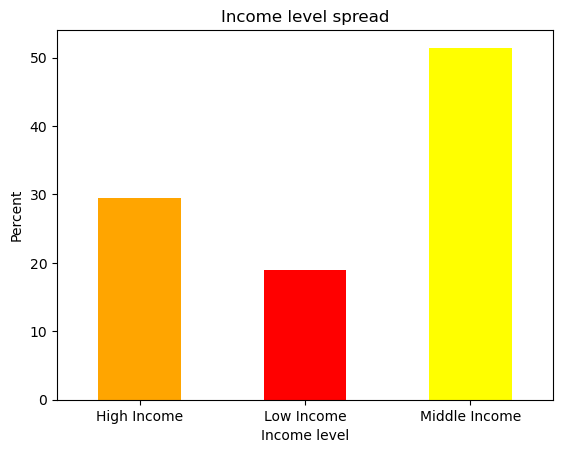

<Figure size 640x480 with 0 Axes>

In [109]:
# Create a Bar Chart for income level

bar_income_level_frequency = (df_ords_prods_cust['income_level'].value_counts(normalize=True) * 100).sort_index()
bar_income_level_frequency.plot.bar(color=['orange', 'red', 'yellow'])
plt.xlabel('Income level')
plt.ylabel('Percent')
plt.title('Income level spread')
plt.xticks(rotation=0)
plt.show()

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_income_level.png'))

In [1]:
# Create a Bar Chart for age group

age_group_percent = (df_ords_prods_cust['age_group'].value_counts(normalize=True) * 100).sort_index()
age_group_percent.plot.bar(color=['blue', 'green', 'lightblue'])
plt.xlabel('Age group')
plt.ylabel('Percent')
plt.title('Age group Percent')
plt.xticks(rotation=0)
plt.show()

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_age_group.png'))

NameError: name 'df_ords_prods_cust' is not defined

In [114]:
#Create dependants category

num_of_dependants=df_ords_prods_cust['dependants'].value_counts()

In [115]:
num_of_dependants

dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

In [120]:
# Create Percentage for bar chart

dependants_percent = (df_ords_prods_cust['dependants'].value_counts(normalize=True) * 100).sort_index()

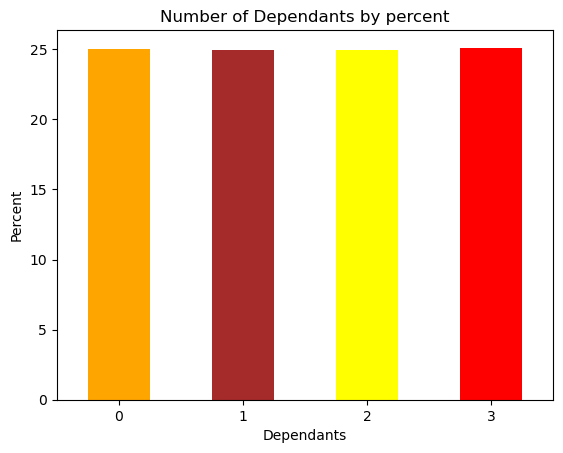

<Figure size 640x480 with 0 Axes>

In [175]:
# Create Bar Chart for dependants percentage

dependants_percent_bar = (df_ords_prods_cust['dependants'].value_counts(normalize=True) * 100).sort_index()
dependants_percent.plot.bar(color=['orange', 'brown', 'yellow', 'red'])
plt.xlabel('Dependants')
plt.ylabel('Percent')
plt.title('Number of Dependants by percent')
plt.xticks(rotation=0)
plt.show()

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_dependants_percent.png'))

In [145]:
# Create a new column customer_profile 

df_ords_prods_cust['customer_profile'] = df_ords_prods_cust['age_group'] + ', ' + df_ords_prods_cust['family_status'] + ', ' + df_ords_prods_cust['income_level']

In [146]:
#Checking output

df_ords_prods_cust['customer_profile'].head()

0    Senior, married, Low Income
1    Senior, married, Low Income
2    Senior, married, Low Income
3    Senior, married, Low Income
4    Senior, married, Low Income
Name: customer_profile, dtype: object

In [147]:
df_ords_prods_cust['customer_profile'].value_counts()

customer_profile
Middle-aged Adult, married, Middle Income                       4995719
Senior, married, High Income                                    4436043
Senior, married, Middle Income                                  4246561
Middle-aged Adult, married, High Income                         2657053
Young Adult, married, Middle Income                             2243654
Middle-aged Adult, married, Low Income                          1901846
Middle-aged Adult, single, Middle Income                        1628840
Senior, divorced/widowed, High Income                           1265448
Senior, divorced/widowed, Middle Income                         1200136
Young Adult, married, Low Income                                1119685
Senior, married, Low Income                                     1115064
Young Adult, single, Middle Income                              1100022
Young Adult, living with parents and siblings, Middle Income    1043553
Middle-aged Adult, single, High Income         

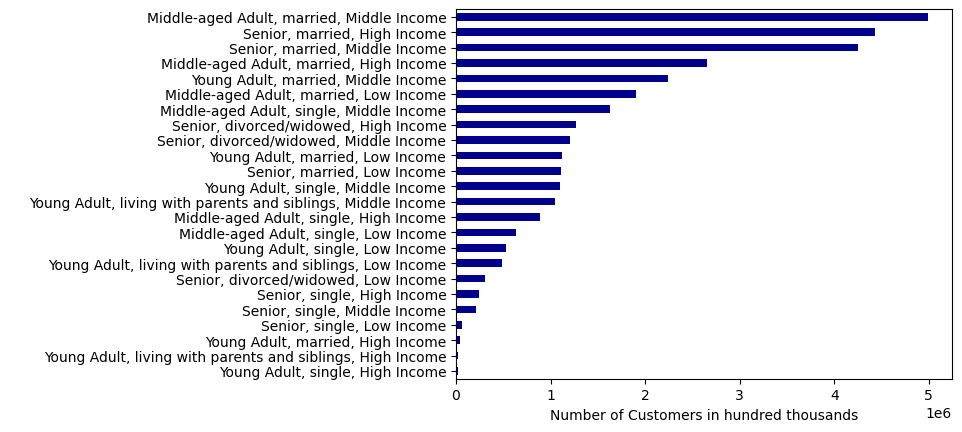

In [151]:
# Visualising the distribution of customer_profile

df_ords_prods_cust['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color='darkblue')
plt.ylabel(' ') # Eliminate y label
plt.xlabel('Number of Customers in hundred thousands')

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'barh_customer_profile.png'))

In [152]:
# Number of dependants by customer profile

cust_dependants = pd.crosstab(df_ords_prods_cust['customer_profile'], df_ords_prods_cust['dependants'], dropna = False)

In [153]:
cust_dependants

dependants,0,1,2,3
customer_profile,,,,
"Middle-aged Adult, married, High Income",0,892769,875250,889034
"Middle-aged Adult, married, Low Income",0,628378,637849,635619
"Middle-aged Adult, married, Middle Income",0,1684793,1648371,1662555
"Middle-aged Adult, single, High Income",890465,0,0,0
"Middle-aged Adult, single, Low Income",639417,0,0,0
"Middle-aged Adult, single, Middle Income",1628840,0,0,0
"Senior, divorced/widowed, High Income",1265448,0,0,0
"Senior, divorced/widowed, Low Income",306228,0,0,0
"Senior, divorced/widowed, Middle Income",1200136,0,0,0


In [154]:
# Crosstab price range by customer profile

customer_price_range = pd.crosstab(df_ords_prods_cust['customer_profile'], df_ords_prods_cust['price_range_loc'], dropna = False)

In [155]:
customer_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
"Middle-aged Adult, married, High Income",39440,791362,1826251
"Middle-aged Adult, married, Low Income",15200,714465,1172181
"Middle-aged Adult, married, Middle Income",68950,1478282,3448487
"Middle-aged Adult, single, High Income",12379,263472,614614
"Middle-aged Adult, single, Low Income",5029,240273,394115
"Middle-aged Adult, single, Middle Income",21862,482526,1124452
"Senior, divorced/widowed, High Income",17914,376531,871003
"Senior, divorced/widowed, Low Income",1060,132752,172416
"Senior, divorced/widowed, Middle Income",16793,356654,826689


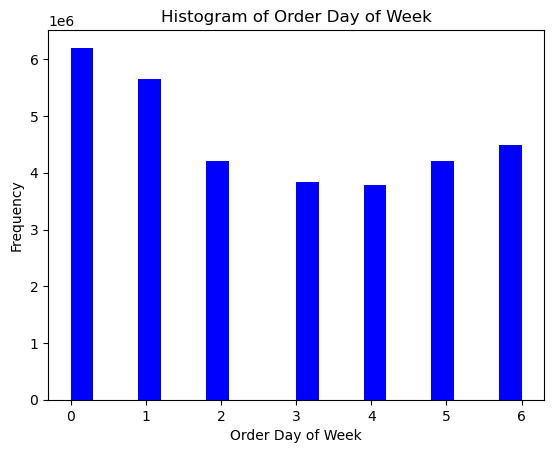

In [161]:
# Visualising the busiest day of the week for orders

busiest_day_of_week = df_ords_prods_cust['orders_day_of_week'].plot.hist(bins = 20, color = 'blue')

plt.xlabel('Order Day of Week')
plt.title('Histogram of Order Day of Week')


busiest_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'busiest_day_of_week.png'))

In [164]:
#Checking output for loyalty flag

df_ords_prods_cust['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

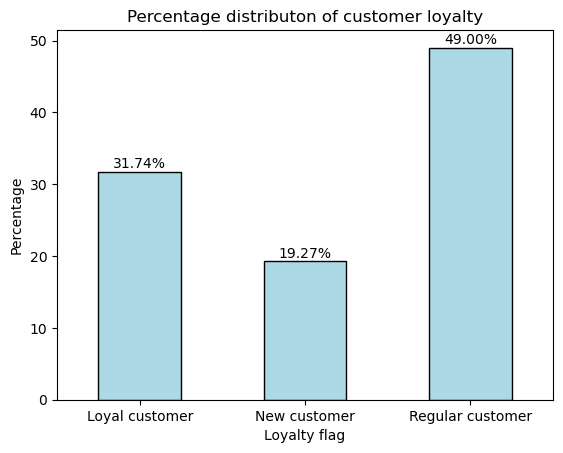

<Figure size 640x480 with 0 Axes>

In [173]:
# Create a bar chart for percentage of Loyalty 

loyalty_distribution = (df_ords_prods_cust['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()
loyalty_distribution.plot.bar(color='lightblue', edgecolor='black')
plt.xlabel('Loyalty flag')
plt.ylabel('Percentage')
plt.title('Percentage distributon of customer loyalty')
#Adding percentage labels on top of each bar
for index, value in enumerate(loyalty_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)
plt.xticks(rotation=0)
plt.show()

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty_percent.png'))

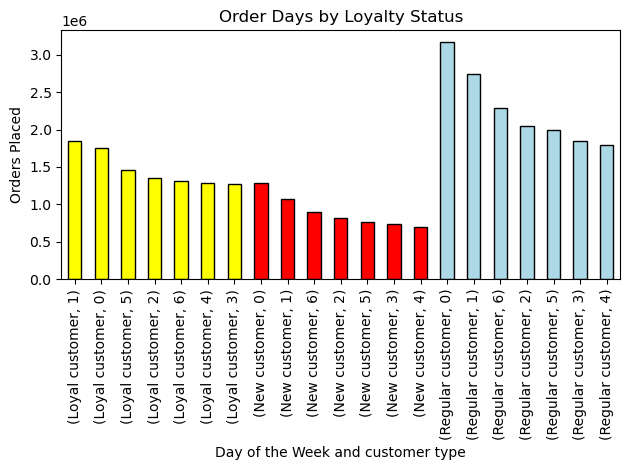

In [178]:
# Create a bar chart for customers daily orders placed by loyalty

loyalty_dow_order_bar = df_ords_prods_cust.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Order Days by Loyalty Status', xlabel = 'Day of the Week and customer type', ylabel = 'Orders Placed', edgecolor = 'black', color=['yellow'] * 7 + ['red'] * 7 + ['lightblue'] * 7)
plt.tight_layout()


loyalty_dow_order_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_day_order_bar.png'))

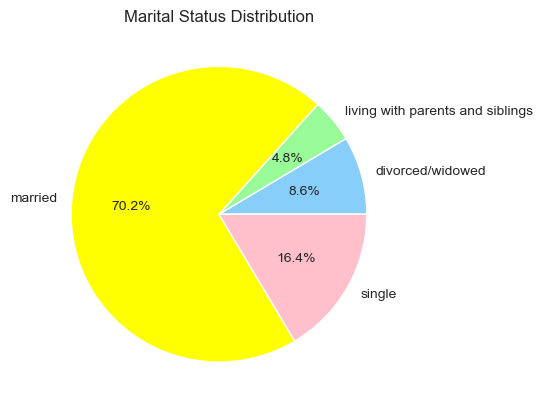

In [187]:
# Create a pie chart of marital status by percentage

marital_distribution = (df_ords_prods_cust['family_status'].value_counts(normalize=True) * 100).sort_index()

marital_pie=plt.pie(marital_distribution, labels=marital_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'yellow', 'pink'])

plt.title('Marital Status Distribution')

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_marital.png'))

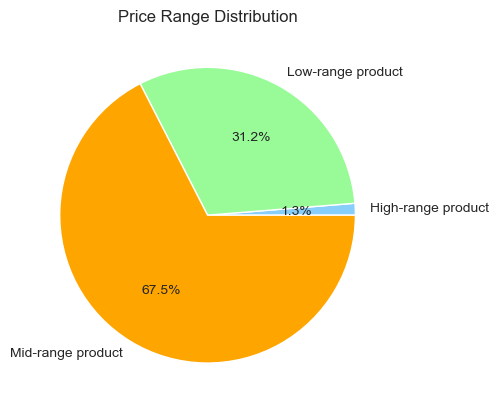

In [192]:
# Plot the pie chart of price range
price_range_distribution = (df_ords_prods_cust['price_range_loc'].value_counts(normalize=True) * 100).sort_index()

Price_range_pie=plt.pie(price_range_distribution, labels=price_range_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'orange'])

plt.title('Price Range Distribution')

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_price_range.png'))

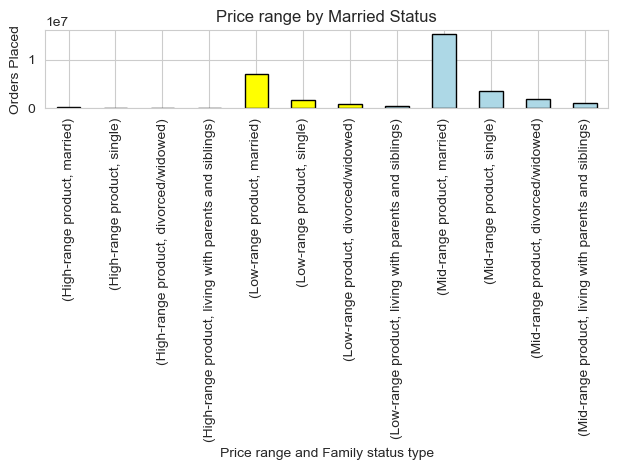

In [191]:
# Create a bar chart for types of products orders by what family status

Marital_order_product_bar = df_ords_prods_cust.groupby('price_range_loc')['family_status'].value_counts().plot.bar(title = 'Price range by Married Status', xlabel = 'Price range and Family status type', ylabel = 'Orders Placed', edgecolor = 'black', color=['yellow'] * 7 + ['lightblue'] * 7 + ['red'] * 7)
plt.tight_layout()


loyalty_dow_order_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'famils_price_order_bar.png'))

In [205]:
# Maping deparment id to names
department_id_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [206]:
department_id_mapping

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli'}

In [207]:
# Create a new 'department_name' column

df_ords_prods_cust['department_name'] =df_ords_prods_cust['department_id'].map(department_id_mapping).fillna('missing')

In [208]:
df_ords_prods_cust['department_name'].value_counts(dropna =  False ).sort_values(ascending = False)

department_name
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

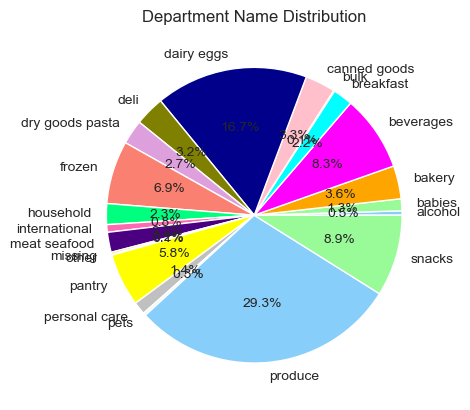

In [209]:
# Plot the pie chart of department_id

department_nm_distribution = (df_ords_prods_cust['department_name'].value_counts(normalize=True) * 100).sort_index()

Department_nm_pie=plt.pie(department_nm_distribution, labels=department_nm_distribution.index, autopct='%1.1f%%', colors = ['lightskyblue', 'palegreen', 'orange', 'magenta', 'cyan', 'gray', 'pink', 'darkblue', 'olive', 'plum', 'salmon', 'springgreen', 'hotpink', 'indigo', 'gold', 'firebrick', 'yellow', 'silver', 'whitesmoke'])

plt.title('Department Name Distribution')

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'department_nm_range.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [200]:
# Calculate order frequency by customer profile using day since last order

prior_order_customer_prof = df_ords_prods_cust.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','median','max']})
prior_order_customer_prof

days_since_prior_order  \
                                                                     mean   
customer_profile                                                            
Middle-aged Adult, married, High Income                         11.068346   
Middle-aged Adult, married, Low Income                          11.373132   
Middle-aged Adult, married, Middle Income                       11.003713   
Middle-aged Adult, single, High Income                          10.989726   
Middle-aged Adult, single, Low Income                           11.294182   
Middle-aged Adult, single, Middle Income                        11.075534   
Senior, divorced/widowed, High Income                           10.946835   
Senior, divorced/widowed, Low Income                            11.709469   
Senior, divorced/widowed, Middle Income                         10.987702   
Senior, married, High Income                                    11.076864   
Senior, married, Low Income                                     11.691410   
Senior, married, Middle Income                                  11.043163   
Senior, single, High Income                                     10.530705   
Senior, single, Low Income                                      11.494359   
Senior, single, Middle Income                                   10.733098   
Young Adult, living with parents and siblings, ...               9.247749   
Young Adult, living with parents and siblings, ...              11.338661   
Young Adult, living with parents and siblings, ...              10.945271   
Young Adult, married, High Income                               10.621978   
Young Adult, married, Low Income                                11.253620   
Young Adult, married, Middle Income                             11.081485   
Young Adult, single, High Income                                11.044011   
Young Adult, single, Low Income                                 11.510777   
Young Adult, single, Middle Income                              11.086766   

                                                                      
                                                    min median   max  
customer_profile                                                      
Middle-aged Adult, married, High Income             0.0    8.0  30.0  
Middle-aged Adult, married, Low Income              0.0    8.0  30.0  
Middle-aged Adult, married, Middle Income           0.0    8.0  30.0  
Middle-aged Adult, single, High Income              0.0    8.0  30.0  
Middle-aged Adult, single, Low Income               0.0    8.0  30.0  
Middle-aged Adult, single, Middle Income            0.0    8.0  30.0  
Senior, divorced/widowed, High Income               0.0    7.0  30.0  
Senior, divorced/widowed, Low Income                0.0    8.0  30.0  
Senior, divorced/widowed, Middle Income             0.0    8.0  30.0  
Senior, married, High Income                        0.0    8.0  30.0  
Senior, married, Low Income                         0.0    8.0  30.0  
Senior, married, Middle Income                      0.0    8.0  30.0  
Senior, single, High Income                         0.0    7.0  30.0  
Senior, single, Low Income                          0.0    8.0  30.0  
Senior, single, Middle Income                       0.0    7.0  30.0  
Young Adult, living with parents and siblings, ...  0.0    7.0  30.0  
Young Adult, living with parents and siblings, ...  0.0    8.0  30.0  
Young Adult, living with parents and siblings, ...  0.0    7.0  30.0  
Young Adult, married, High Income                   0.0    7.0  30.0  
Young Adult, married, Low Income                    0.0    8.0  30.0  
Young Adult, married, Middle Income                 0.0    8.0  30.0  
Young Adult, single, High Income                    0.0    8.0  30.0  
Young Adult, single, Low Income                     0.0    8.0  30.0  
Young Adult, single, Middle Income                  0.0    8.0  30.0

In [201]:
# Calculate expenditure frequency by customer profile and average spend

avg_spend_customer_prof = df_ords_prods_cust.groupby('customer_profile').agg({'average_spend': ['mean','min','median','max']})
avg_spend_customer_prof

average_spend             \
                                                            mean        min   
customer_profile                                                              
Middle-aged Adult, married, High Income                20.067911   7.000000   
Middle-aged Adult, married, Low Income                  7.120453   1.000000   
Middle-aged Adult, married, Middle Income               9.066780   7.000000   
Middle-aged Adult, single, High Income                 22.009737   7.000380   
Middle-aged Adult, single, Low Income                   7.137877   1.000000   
Middle-aged Adult, single, Middle Income                9.609104   7.001498   
Senior, divorced/widowed, High Income                  15.135957   7.000000   
Senior, divorced/widowed, Low Income                    6.505732   1.200000   
Senior, divorced/widowed, Middle Income                 8.833522   7.000000   
Senior, married, High Income                           16.739193   7.000000   
Senior, married, Low Income                             6.496747   1.000000   
Senior, married, Middle Income                          8.752669   7.000000   
Senior, single, High Income                            16.741349   7.000935   
Senior, single, Low Income                              6.541499   2.382759   
Senior, single, Middle Income                           7.950717   7.000000   
Young Adult, living with parents and siblings, ...    196.886002  25.512938   
Young Adult, living with parents and siblings, ...      7.445149   1.300000   
Young Adult, living with parents and siblings, ...      9.138584   7.001493   
Young Adult, married, High Income                     307.854411  28.539161   
Young Adult, married, Low Income                        7.433937   1.100000   
Young Adult, married, Middle Income                     9.536814   7.000000   
Young Adult, single, High Income                      409.609941  26.759379   
Young Adult, single, Low Income                         7.396409   1.000000   
Young Adult, single, Middle Income                      9.122259   7.000800   

                                                                              
                                                        median           max  
customer_profile                                                              
Middle-aged Adult, married, High Income               7.949667  11772.100000  
Middle-aged Adult, married, Low Income                6.925392     21.272202  
Middle-aged Adult, married, Middle Income             7.912548  12506.925000  
Middle-aged Adult, single, High Income                7.931025  25005.425000  
Middle-aged Adult, single, Low Income                 6.924390     20.229362  
Middle-aged Adult, single, Middle Income              7.900000   5135.893590  
Senior, divorced/widowed, High Income                 7.930508  14042.512281  
Senior, divorced/widowed, Low Income                  6.695041      7.000000  
Senior, divorced/widowed, Middle Income               7.922837   2522.939623  
Senior, married, High Income                          7.930058   8703.400000  
Senior, married, Low Income                           6.663653      7.000000  
Senior, married, Middle Income                        7.902027   4768.028571  
Senior, single, High Income                           7.907500   2292.200508  
Senior, single, Low Income                            6.694421      7.000000  
Senior, single, Middle Income                         7.871500     12.600000  
Young Adult, living with parents and siblings, ...   81.822030  10209.987755  
Young Adult, living with parents and siblings, ...    7.518064     14.000000  
Young Adult, living with parents and siblings, ...    7.904468   1618.085484  
Young Adult, married, High Income                   155.790594   4924.385246  
Young Adult, married, Low Income                      7.477049     20.078024  
Young Adult, married, Middle Income                   7.896254   3402.921296  
Young Adult, single, 

In [202]:
# Calculate expenditure by customer profile and prices

price_customer_prof = df_ords_prods_cust.groupby('customer_profile').agg({'prices': ['mean','min','median','max']})
price_customer_prof

prices              \
                                                          mean  min median   
customer_profile                                                             
Middle-aged Adult, married, High Income              20.067911  1.0    7.7   
Middle-aged Adult, married, Low Income                7.120453  1.0    6.6   
Middle-aged Adult, married, Middle Income             9.066780  1.0    7.7   
Middle-aged Adult, single, High Income               22.009737  1.0    7.7   
Middle-aged Adult, single, Low Income                 7.137877  1.0    6.6   
Middle-aged Adult, single, Middle Income              9.609104  1.0    7.7   
Senior, divorced/widowed, High Income                15.135957  1.0    7.7   
Senior, divorced/widowed, Low Income                  6.505732  1.0    5.8   
Senior, divorced/widowed, Middle Income               8.833522  1.0    7.7   
Senior, married, High Income                         16.739193  1.0    7.7   
Senior, married, Low Income                           6.496747  1.0    5.8   
Senior, married, Middle Income                        8.752669  1.0    7.7   
Senior, single, High Income                          16.741349  1.0    7.5   
Senior, single, Low Income                            6.541499  1.0    5.9   
Senior, single, Middle Income                         7.950717  1.0    7.6   
Young Adult, living with parents and siblings, ...  196.886002  1.0    7.7   
Young Adult, living with parents and siblings, ...    7.445149  1.0    6.9   
Young Adult, living with parents and siblings, ...    9.138584  1.0    7.7   
Young Adult, married, High Income                   307.854411  1.0    7.4   
Young Adult, married, Low Income                      7.433937  1.0    6.9   
Young Adult, married, Middle Income                   9.536814  1.0    7.6   
Young Adult, single, High Income                    409.609941  1.0    7.4   
Young Adult, single, Low Income                       7.396409  1.0    6.9   
Young Adult, single, Middle Income                    9.122259  1.0    7.7   

                                                             
                                                        max  
customer_profile                                             
Middle-aged Adult, married, High Income             99999.0  
Middle-aged Adult, married, Low Income              14900.0  
Middle-aged Adult, married, Middle Income           99999.0  
Middle-aged Adult, single, High Income              99999.0  
Middle-aged Adult, single, Low Income               14900.0  
Middle-aged Adult, single, Middle Income            99999.0  
Senior, divorced/widowed, High Income               99999.0  
Senior, divorced/widowed, Low Income                   25.0  
Senior, divorced/widowed, Middle Income             99999.0  
Senior, married, High Income                        99999.0  
Senior, married, Low Income                            25.0  
Senior, married, Middle Income                      99999.0  
Senior, single, High Income                         99999.0  
Senior, single, Low Income                             25.0  
Senior, single, Middle Income                          25.0  
Young Adult, living with parents and siblings, ...  99999.0  
Young Adult, living with parents and siblings, ...     25.0  
Young Adult, living with parents and siblings, ...  99999.0  
Young Adult, married, High Income                   99999.0  
Young Adult, married, Low Income                    14900.0  
Young Adult, married, Middle Income                 99999.0  
Young Adult, single, High Income                    99999.0  
Young Adult, single, Low Income                        25.0  
Young Adult, single, Middle Income                  99999.0

## 0.8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [212]:
# Grouping (newly created) department name and loyalty flag

loyalty_dept_group = df_ords_prods_cust.groupby(['department_name', 'loyalty_flag']).size().unstack()


In [213]:
loyalty_dept_group

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


In [214]:
# Sort the values of loyalty_dept_group
loyalty_dept_group = loyalty_dept_group.sort_values(by = 'Regular customer', ascending = False)

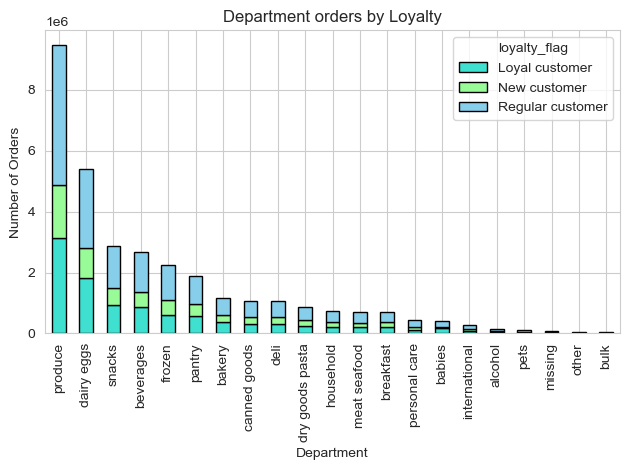

In [215]:
# Creating bar chart number of orders by department and loyalty flag
colors = ['turquoise', 'palegreen','skyblue']
loyalty_dept_group_bar = loyalty_dept_group.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
plt.title('Department orders by Loyalty')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# Saving as PNG
loyalty_dept_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyal_dept_group_bar .png'))

In [217]:
# Grouping (newly created) department name and region

dept_region = df_ords_prods_cust.groupby(['department_name', 'regions']).size().unstack()

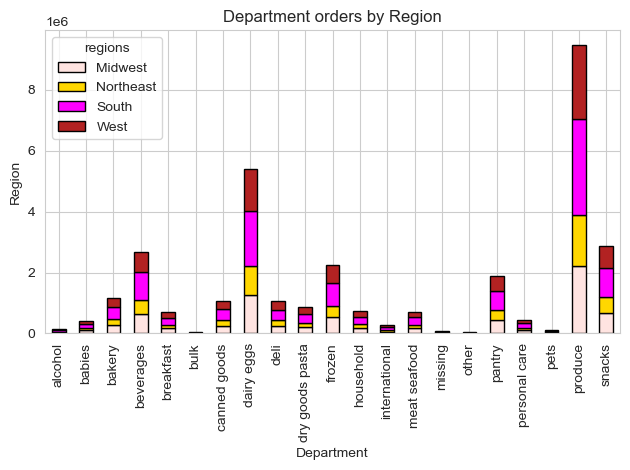

In [218]:
# Create bar chart number of orders by department and region
colors = ['mistyrose', 'gold','magenta', 'firebrick']
dept_region = dept_region.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
plt.title('Department orders by Region')
plt.xlabel('Department')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Saving as PNG
dept_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'dept_region.png'))

In [257]:
# Create a subset to analyze customer ordering habits

cust_order_habits = df_ords_prods_cust[['user_id','regions','income_level','product_name','age_group','department_name','family_status','loyalty_flag','frequency_flag','price_range_loc','spending_flag','customer_profile']]


In [244]:
# Group loyalty flag by region
grouped_loyalty_region = cust_order_habits.groupby(['regions', 'loyalty_flag']).size().unstack()

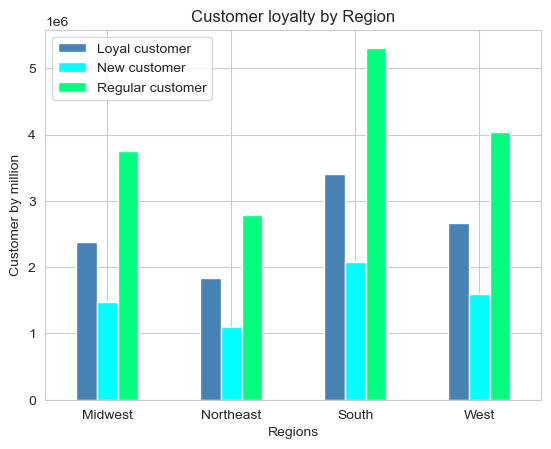

In [245]:
# Create bar chart of loyalty flag by region
grouped_loyalty_region.plot(kind='bar', color=['steelblue', 'cyan', 'springgreen','navy'])
plt.legend(title=None)
plt.xlabel('Regions')
plt.ylabel('Customer by million')
plt.title('Customer loyalty by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_loy.png'))

In [246]:
# Group spending flag by region
grouped_spending_regions = cust_order_habits.groupby(['regions', 'spending_flag']).size().unstack()

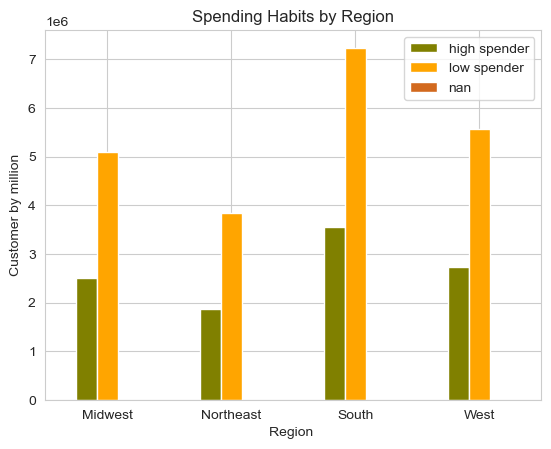

In [252]:
# Create bar chart of spedning flag by region
grouped_spending_regions.plot(kind='bar', color=['olive','orange', 'chocolate'])
plt.legend(title=None)
plt.xlabel('Region ')
plt.ylabel('Customer by million')
plt.title('Spending Habits by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_spend.png'))

In [248]:
# Group order frequncy by region
grouped_order_freq_region = cust_order_habits.groupby(['regions', 'frequency_flag']).size().unstack()

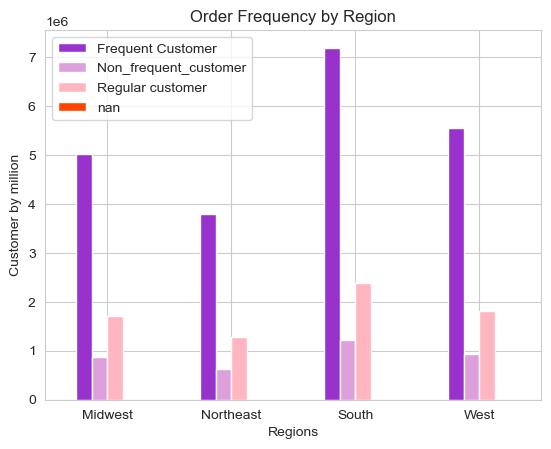

In [251]:
# Create bar chart of order frequency by region
grouped_order_freq_region.plot(kind='bar', color=['darkorchid', 'plum', 'lightpink','orangered'])
plt.legend(title=None)
plt.xlabel('Regions')
plt.ylabel('Customer by million')
plt.title('Order Frequency by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_freq.png'))

In [250]:
# Group customer age group by region

grouped_age_region = cust_order_habits.groupby(['regions', 'age_group']).size().unstack() 

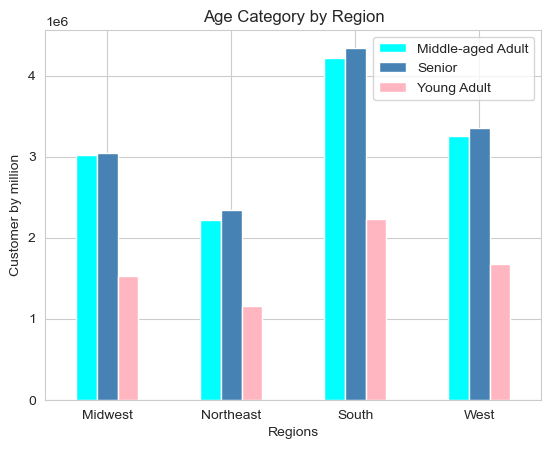

In [255]:
# Create bar chart by age group and region
grouped_age_region.plot(kind='bar', color=['cyan', 'steelblue', 'lightpink'])
plt.legend(title=None,)
plt.xlabel('Regions')
plt.ylabel('Customer by million')
plt.title('Age Category by Region')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_cust_region.png'))

In [258]:
# Group income by loyalty

grouped_income_loyalty = cust_order_habits.groupby (['income_level', 'loyalty_flag']).size().unstack()

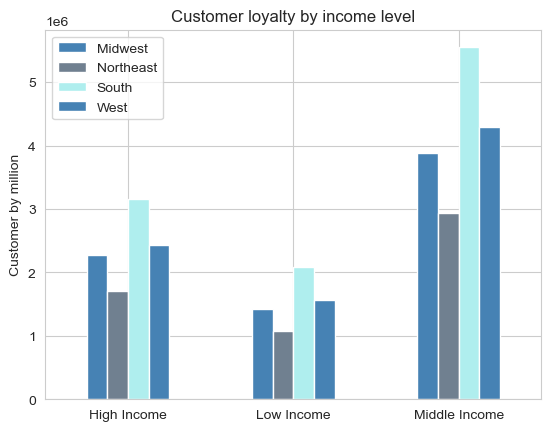

In [264]:
# Create bar chart by income and loyalty
grouped_income_loyalty.plot(kind='bar', color=['steelblue', 'slategray','paleturquoise'])
plt.legend(title=None,)
plt.xlabel('')
plt.ylabel('Customer by million')
plt.title('Customer loyalty by income level')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_loyalty.png'))

In [263]:
# Group income by region

grouped_income_regions = cust_order_habits.groupby (['income_level', 'regions']).size().unstack()

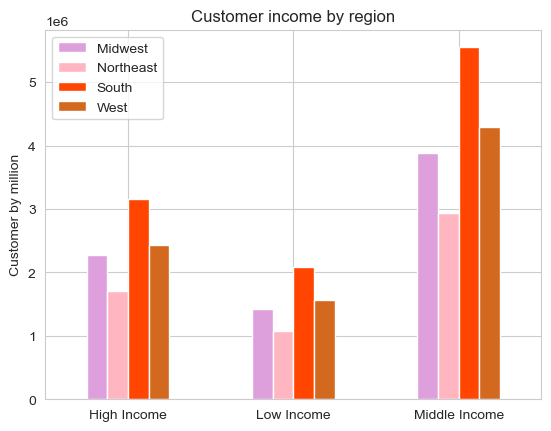

In [266]:
# Create bar chart by income and region
grouped_income_regions.plot(kind='bar', color=['plum', 'lightpink','orangered', 'chocolate'])
plt.legend(title=None,)
plt.xlabel('')
plt.ylabel('Customer by million')
plt.title('Customer income by region')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_region.png'))

In [268]:
# Grouping department name and family status

grouped_dept_family = cust_order_habits.groupby(['department_name', 'family_status']).size().unstack()

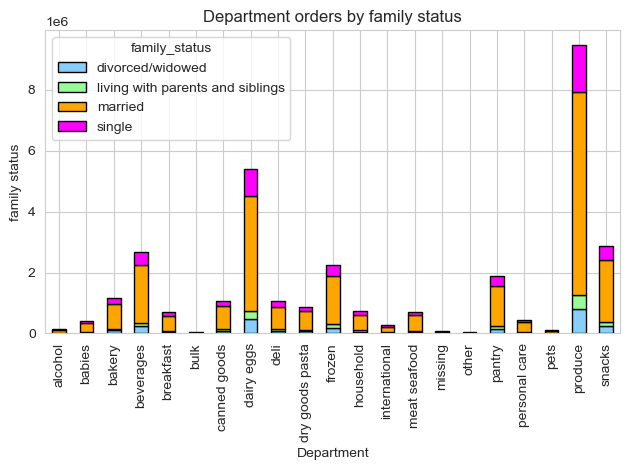

In [269]:
# Creating bar chart number of orders by department and family status
colors = ['lightskyblue', 'palegreen', 'orange', 'magenta', 'cyan', 'gray', 'pink', 'darkblue', 'olive', 'plum', 'salmon', 'springgreen', 'hotpink', 'indigo', 'gold', 'firebrick', 'yellow', 'silver', 'whitesmoke']
grouped_dept_family = grouped_dept_family.plot(kind='bar', stacked=True, edgecolor = 'black', color=colors)
plt.title('Department orders by family status')
plt.xlabel('Department')
plt.ylabel('family status')
plt.tight_layout()
plt.show()

# Saving as PNG
grouped_dept_family.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'family status_bar .png'))

In [270]:
# Group family status by region
grouped_family_regions = cust_order_habits.groupby(['regions', 'family_status']).size().unstack()

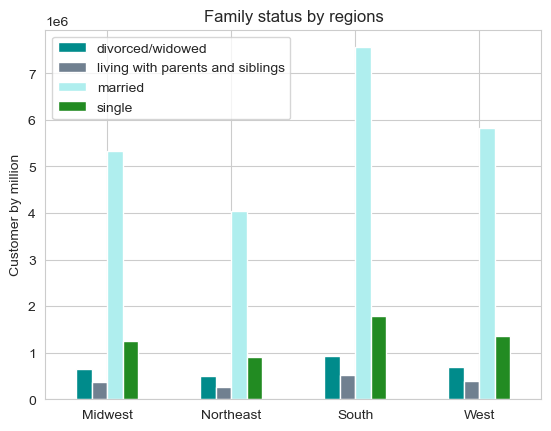

In [272]:
# Create bar chart by family status and regions

grouped_family_regions.plot(kind='bar', color=['darkcyan', 'slategray','paleturquoise', 'forestgreen'])
plt.legend(title=None,)
plt.xlabel('')
plt.ylabel('Customer by million')
plt.title('Family status by regions')
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'family_regions.png'))

#### From the various combinations of customer profile with department id/name and region performed above, it could be concluded that the South region, Married, middle income, middle-aged (or senior) adults are the main spenders. Particulary on produce with dairy/eggs and beverages as second and third most popular departments. We can also see that loyal and regular customers are the main spenders across all regions. 

In [277]:
# Exporting dataset as pickle format

df_ords_prods_cust.to_pickle(os.path.join(path, '02 Data ', 'Prepared Data', 'df_ords_prods_cust_final.pkl'))